In [1]:
# Import SQLAlchemy dependencies  
from sqlalchemy import create_engine, func  
from sqlalchemy.ext.automap import automap_base  
from sqlalchemy.orm import Session  
  
# Create engine to hawaii.sqlite  
engine = create_engine("sqlite:///Resources/hawaii.sqlite")  
  
# Reflect an existing database into a new model  
Base = automap_base()  
# Updated line to remove deprecation warning:  
Base.prepare(autoload_with=engine)  
  
# Save references to each table  
Measurement = Base.classes.measurement  
Station = Base.classes.station  
  
# Create our session (link) from Python to the DB  
session = Session(engine)  
  
print("Database connection established!")  

Database connection established!


In [3]:
# Install required packages using pip
%pip install numpy pandas sqlalchemy matplotlib seaborn
print("Installation complete!")

Note: you may need to restart the kernel to use updated packages.
Installation complete!



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
# Import dependencies  
import numpy as np  
import pandas as pd  
import datetime as dt  
import sqlalchemy  
from sqlalchemy.ext.automap import automap_base  
from sqlalchemy.orm import Session  
from sqlalchemy import create_engine, func  
  
print("Imports successful!")  

Imports successful!


In [7]:
# Create engine to hawaii.sqlite  
engine = create_engine("sqlite:///Resources/hawaii.sqlite")  
  
# reflect an existing database into a new model  
Base = automap_base()  
# reflect the tables  
Base.prepare(engine, reflect=True)  
  
# View all of the classes that automap found  
print("Tables in database:", Base.classes.keys())  

Tables in database: ['station', 'measurement']


C:\Users\mjnea\AppData\Local\Temp\ipykernel_6924\2438685585.py:7: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


In [9]:
from sqlalchemy.ext.automap import automap_base  
from sqlalchemy import create_engine  
  
# Set up the engine for the SQLite database  
engine = create_engine("sqlite:///Resources/hawaii.sqlite")  
  
# Prepare automap base  
Base = automap_base()  
Base.prepare(engine, reflect=True)  
  
# List the tables automap finds  
print("Tables in database:", Base.classes.keys())  

Tables in database: ['station', 'measurement']


C:\Users\mjnea\AppData\Local\Temp\ipykernel_6924\931606340.py:9: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


In [11]:
# Import SQLAlchemy dependencies  
from sqlalchemy import create_engine, func  
from sqlalchemy.ext.automap import automap_base  
from sqlalchemy.orm import Session  
  
# Create engine to hawaii.sqlite  
engine = create_engine("sqlite:///Resources/hawaii.sqlite")  
  
# Reflect an existing database into a new model  
Base = automap_base()  
Base.prepare(engine, reflect=True)  
  
# Save references to each table  
Measurement = Base.classes.measurement  
Station = Base.classes.station  
  
# Create our session (link) from Python to the DB  
session = Session(engine)  
  
print("Database connection established!")  

Database connection established!


C:\Users\mjnea\AppData\Local\Temp\ipykernel_6924\3157916394.py:11: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


First few rows of precipitation data:
            Date  Precipitation
0     2016-08-23           0.00
1009  2016-08-23            NaN
1529  2016-08-23           1.79
704   2016-08-23           0.05
361   2016-08-23           0.15


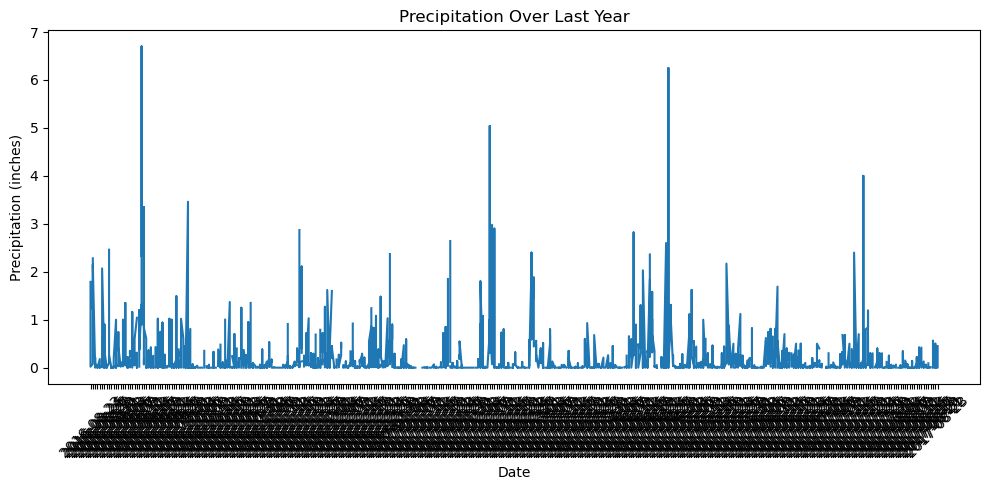

In [13]:
# Import dependencies  
import pandas as pd  
import matplotlib.pyplot as plt  
from datetime import datetime, timedelta  
  
# Get the latest date in measurement table  
query = session.query(Measurement.date)  
query = query.order_by(Measurement.date.desc())  
latest_date = query.first()[0]  
latest_date = datetime.strptime(latest_date, '%Y-%m-%d')  
one_year_ago = latest_date - timedelta(days=365)  
  
# Query for precipitation data for the last year  
query = session.query(Measurement.date, Measurement.prcp)  
query = query.filter(Measurement.date >= one_year_ago.strftime('%Y-%m-%d'))  
precipitation_data = query.all()  
  
# Convert the query results to a DataFrame  
prcp_df = pd.DataFrame(precipitation_data, columns=['Date', 'Precipitation'])  
prcp_df.sort_values('Date', inplace=True)  
  
# Display the first few rows  
print("First few rows of precipitation data:")  
print(prcp_df.head())  
  
# Create the plot  
plt.figure(figsize=(10, 5))  
plt.plot(prcp_df['Date'], prcp_df['Precipitation'])  
plt.title('Precipitation Over Last Year')  
plt.xlabel('Date')  
plt.ylabel('Precipitation (inches)')  
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()  
  
# Close the session  
session.close()  

In [15]:
# Save references to each table  
Measurement = Base.classes.measurement  
Station = Base.classes.station  
  
# Create our session (link) from Python to the DB  
session = Session(engine)  
  
# Let's verify our data by looking at a few rows from each table  
# First, let's look at the Measurement table  
print("Sample of Measurement data:")  
first_five_measurements = session.query(Measurement).limit(5).all()  
for measurement in first_five_measurements:  
    print(f"Date: {measurement.date}, Station: {measurement.station}, Prcp: {measurement.prcp}, Temp: {measurement.tobs}")  
  
print("\nSample of Station data:")  
first_five_stations = session.query(Station).limit(5).all()  
for station in first_five_stations:  
    print(f"Station: {station.station}, Name: {station.name}, Latitude: {station.latitude}, Longitude: {station.longitude}")  
  
# Close the session  
session.close()  

Sample of Measurement data:
Date: 2010-01-01, Station: USC00519397, Prcp: 0.08, Temp: 65.0
Date: 2010-01-02, Station: USC00519397, Prcp: 0.0, Temp: 63.0
Date: 2010-01-03, Station: USC00519397, Prcp: 0.0, Temp: 74.0
Date: 2010-01-04, Station: USC00519397, Prcp: 0.0, Temp: 76.0
Date: 2010-01-06, Station: USC00519397, Prcp: None, Temp: 73.0

Sample of Station data:
Station: USC00519397, Name: WAIKIKI 717.2, HI US, Latitude: 21.2716, Longitude: -157.8168
Station: USC00513117, Name: KANEOHE 838.1, HI US, Latitude: 21.4234, Longitude: -157.8015
Station: USC00514830, Name: KUALOA RANCH HEADQUARTERS 886.9, HI US, Latitude: 21.5213, Longitude: -157.8374
Station: USC00517948, Name: PEARL CITY, HI US, Latitude: 21.3934, Longitude: -157.9751
Station: USC00518838, Name: UPPER WAHIAWA 874.3, HI US, Latitude: 21.4992, Longitude: -158.0111


In [17]:
# This cell identifies the most active station  
  
# First, create the query without using backslashes.  
query = session.query(Measurement.station, func.count(Measurement.station))  
query = query.group_by(Measurement.station)  
query = query.order_by(func.count(Measurement.station).desc())  
most_active = query.first()  
  
# Print the most active station and its observation count.  
print("Most active station:", most_active[0])  
print("Number of observations:", most_active[1])  

Most active station: USC00519281
Number of observations: 2772


In [21]:
# Get temperature summary statistics for the most active station  
active_station = most_active[0]  
  
temp_stats = (  
    session.query(  
        func.min(Measurement.tobs),  
        func.max(Measurement.tobs),  
        func.avg(Measurement.tobs)  
    )  
    .filter(Measurement.station == active_station)  
    .all()  
)  
  
print("Temperature Summary Statistics for Station", active_station)  
print("Minimum Temperature:", temp_stats[0][0], "°F")  
print("Maximum Temperature:", temp_stats[0][1], "°F")  
print("Average Temperature:", round(temp_stats[0][2], 2), "°F")  

Temperature Summary Statistics for Station USC00519281
Minimum Temperature: 54.0 °F
Maximum Temperature: 85.0 °F
Average Temperature: 71.66 °F


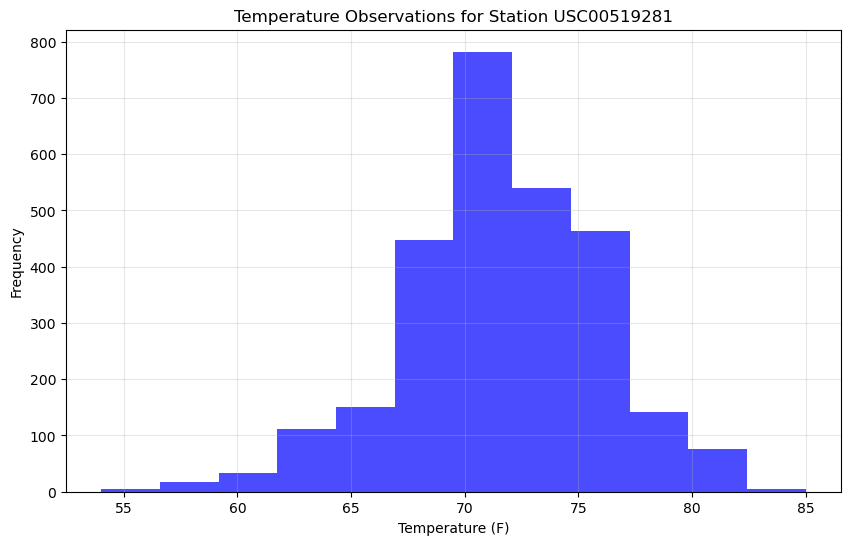

In [27]:
# Get temperature data for the most active station for the last year  
station_temps = session.query(Measurement.tobs).filter(Measurement.station == active_station).all()  
  
# Convert to DataFrame  
temp_df = pd.DataFrame(station_temps, columns=['Temperature'])  
  
# Create histogram  
plt.figure(figsize=(10,6))  
plt.hist(temp_df['Temperature'], bins=12, color='blue', alpha=0.7)  
plt.title("Temperature Observations for Station USC00519281")  
plt.xlabel("Temperature (F)")  
plt.ylabel("Frequency")  
plt.grid(True, alpha=0.3)  
plt.show()  

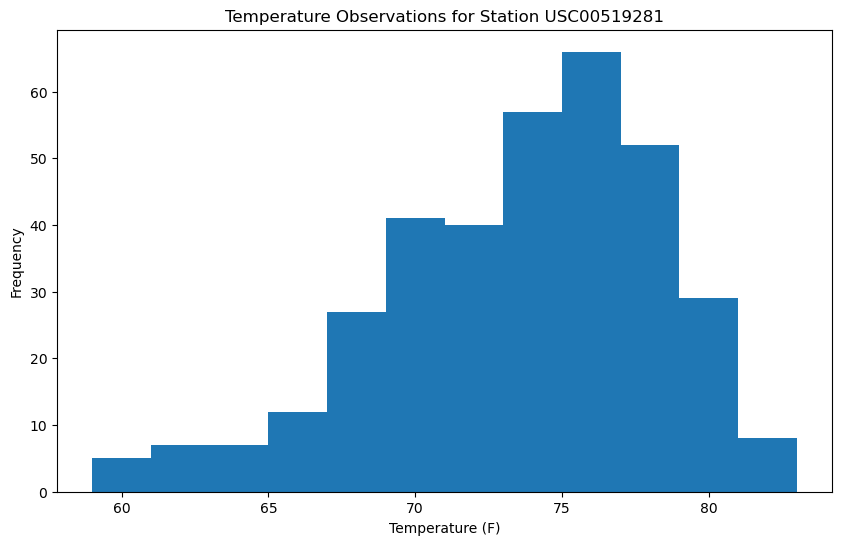

In [25]:
# Get temperature observations for last 12 months  
station_temps = session.query(Measurement.tobs).filter(Measurement.station == active_station).filter(Measurement.date >= one_year_ago).all()  
  
# Convert to DataFrame and plot  
temp_df = pd.DataFrame(station_temps, columns=['Temperature'])  
  
plt.figure(figsize=(10,6))  
plt.hist(temp_df['Temperature'], bins=12)  
plt.title("Temperature Observations for Station " + active_station)  
plt.xlabel("Temperature (F)")  
plt.ylabel("Frequency")  
plt.show()  

In [29]:
# Query all station details from the Station table  
stations = session.query(Station).all()  
  
# Convert station details to a list of dictionaries for a quick view  
station_list = []  
for station in stations:  
    station_list.append({  
        "station": station.station,  
        "name": station.name,  
        "latitude": station.latitude,  
        "longitude": station.longitude,  
        "elevation": station.elevation  
    })  
  
# Display the station details  
print("Station Details:")  
for s in station_list:  
    print(s)  

Station Details:
{'station': 'USC00519397', 'name': 'WAIKIKI 717.2, HI US', 'latitude': 21.2716, 'longitude': -157.8168, 'elevation': 3.0}
{'station': 'USC00513117', 'name': 'KANEOHE 838.1, HI US', 'latitude': 21.4234, 'longitude': -157.8015, 'elevation': 14.6}
{'station': 'USC00514830', 'name': 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 'latitude': 21.5213, 'longitude': -157.8374, 'elevation': 7.0}
{'station': 'USC00517948', 'name': 'PEARL CITY, HI US', 'latitude': 21.3934, 'longitude': -157.9751, 'elevation': 11.9}
{'station': 'USC00518838', 'name': 'UPPER WAHIAWA 874.3, HI US', 'latitude': 21.4992, 'longitude': -158.0111, 'elevation': 306.6}
{'station': 'USC00519523', 'name': 'WAIMANALO EXPERIMENTAL FARM, HI US', 'latitude': 21.33556, 'longitude': -157.71139, 'elevation': 19.5}
{'station': 'USC00519281', 'name': 'WAIHEE 837.5, HI US', 'latitude': 21.45167, 'longitude': -157.84888999999998, 'elevation': 32.9}
{'station': 'USC00511918', 'name': 'HONOLULU OBSERVATORY 702.2, HI US', 'lat